# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CS gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import os, sys
HOME = "/home/shelly/Quantum/ignis2"
QISKIT_ROOT = HOME
root_dir = os.path.expanduser(QISKIT_ROOT)
sys.path = [os.path.expanduser(QISKIT_ROOT)] + sys.path
HOME = "/home/shelly/Quantum/qiskit-terra"
QISKIT_ROOT = HOME
root_dir = os.path.expanduser(QISKIT_ROOT)
sys.path = [os.path.expanduser(QISKIT_ROOT)] + sys.path
#print (sys.path)

import qiskit.ignis.verification.randomized_benchmarking as rb
#print(rb.__file__)

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 3 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 5
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'

### Interleaved RB with a CS gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

rb_opts['interleaved_gates'] = [(CS01, [('cs', 0, 1)])]

rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

         ┌────────────┐┌───┐┌───┐┌──────────┐ ░  ░ ┌────────────┐┌───┐┌───┐»
qr_0: |0>┤ U1(4.7124) ├┤ X ├┤ X ├┤ U1(pi/2) ├─░──░─┤ U1(4.7124) ├┤ X ├┤ X ├»
         └┬──────────┬┘├───┤└─┬─┘└──────────┘ ░  ░ └────────────┘└─┬─┘├───┤»
qr_1: |0>─┤ U1(pi/2) ├─┤ X ├──■───────────────░──░─────────────────■──┤ X ├»
          └──────────┘ └───┘                  ░  ░                    └───┘»
 cr_0: 0 ══════════════════════════════════════════════════════════════════»
                                                                           »
 cr_1: 0 ══════════════════════════════════════════════════════════════════»
                                                                           »
«       ┌──────────┐ ┌─┐   
«qr_0: ─┤ U1(pi/2) ├─┤M├───
«      ┌┴──────────┴┐└╥┘┌─┐
«qr_1: ┤ U1(4.7124) ├─╫─┤M├
«      └────────────┘ ║ └╥┘
«cr_0: ═══════════════╩══╬═
«                        ║ 
«cr_1: ══════════════════╩═
«                          


In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

         ┌────────────┐┌───┐┌───┐┌──────────┐ ░ ┌──────────┐ ░  ░ ┌───────────┐»
qr_0: |0>┤ U1(4.7124) ├┤ X ├┤ X ├┤ U1(pi/2) ├─░─┤0         ├─░──░─┤ U1(3.927) ├»
         └┬──────────┬┘├───┤└─┬─┘└──────────┘ ░ │  unitary │ ░  ░ └───────────┘»
qr_1: |0>─┤ U1(pi/2) ├─┤ X ├──■───────────────░─┤1         ├─░──░──────────────»
          └──────────┘ └───┘                  ░ └──────────┘ ░  ░              »
 cr_0: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
 cr_1: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
«      ┌───┐┌───┐ ┌──────────┐ ┌─┐   
«qr_0: ┤ X ├┤ X ├─┤ U1(pi/4) ├─┤M├───
«      └─┬─┘├───┤┌┴──────────┴┐└╥┘┌─┐
«qr_1: ──■──┤ X ├┤ U1(5.4978) ├─╫─┤M├
«           └───┘└────────────┘ ║ └╥┘
«cr_0: ═════════════════════════╩══╬═
«                                  ║ 
«cr_1

In [6]:
print (rb_cnotdihedral_X_circs[0][0])

         ┌───┐ ░ ┌────────────┐┌───┐┌───┐┌──────────┐ ░  ░ ┌────────────┐┌───┐»
qr_0: |0>┤ H ├─░─┤ U1(4.7124) ├┤ X ├┤ X ├┤ U1(pi/2) ├─░──░─┤ U1(4.7124) ├┤ X ├»
         ├───┤ ░ └┬──────────┬┘├───┤└─┬─┘└──────────┘ ░  ░ └────────────┘└─┬─┘»
qr_1: |0>┤ H ├─░──┤ U1(pi/2) ├─┤ X ├──■───────────────░──░─────────────────■──»
         └───┘ ░  └──────────┘ └───┘                  ░  ░                    »
 cr_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
 cr_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
«      ┌───┐ ┌──────────┐  ░ ┌───┐┌─┐   
«qr_0: ┤ X ├─┤ U1(pi/2) ├──░─┤ H ├┤M├───
«      ├───┤┌┴──────────┴┐ ░ ├───┤└╥┘┌─┐
«qr_1: ┤ X ├┤ U1(4.7124) ├─░─┤ H ├─╫─┤M├
«      └───┘└────────────┘ ░ └───┘ ║ └╥┘
«cr_0: ════════════════════════════╩══╬═
«                                 

In [7]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

         ┌───┐ ░ ┌────────────┐┌───┐┌───┐┌──────────┐ ░ ┌──────────┐ ░  ░ »
qr_0: |0>┤ H ├─░─┤ U1(4.7124) ├┤ X ├┤ X ├┤ U1(pi/2) ├─░─┤0         ├─░──░─»
         ├───┤ ░ └┬──────────┬┘├───┤└─┬─┘└──────────┘ ░ │  unitary │ ░  ░ »
qr_1: |0>┤ H ├─░──┤ U1(pi/2) ├─┤ X ├──■───────────────░─┤1         ├─░──░─»
         └───┘ ░  └──────────┘ └───┘                  ░ └──────────┘ ░  ░ »
 cr_0: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
 cr_1: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
«      ┌───────────┐┌───┐┌───┐ ┌──────────┐  ░ ┌───┐┌─┐   
«qr_0: ┤ U1(3.927) ├┤ X ├┤ X ├─┤ U1(pi/4) ├──░─┤ H ├┤M├───
«      └───────────┘└─┬─┘├───┤┌┴──────────┴┐ ░ ├───┤└╥┘┌─┐
«qr_1: ───────────────■──┤ X ├┤ U1(5.4978) ├─░─┤ H ├─╫─┤M├
«                        └───┘└────────────┘ ░ └───┘ ║ └╥┘
«cr_0: ══════════════

### Add a depolarize noise to the CS gate

In [40]:
cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

### Add depolarizing error to "cs" gate

p1Q = 0.002
p2Q = 0.04

# Construct the error
cs_error = errors.depolarizing_error(p2Q/2, 2)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print("basis_gates:", basis_gates)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'u3', 'cs', 'cx']
  All-qubits errors: ['u2', 'u3', 'cx', 'cs']
basis_gates: ['cx', 'id', 'u2', 'u3', 'unitary']


### Execute the RB sequences

In [41]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral X Circuits


In [42]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [43]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Z Circuits


In [44]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [45]:
#Create the cnot-dihedral Z and X RB fitters
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [46]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.72661065, 0.921877  , 0.25699525]), 'params_err': array([0.02096318, 0.00872107, 0.00711534]), 'epc': 0.05859225323873832, 'epc_err': 0.007095094449729452}


In [47]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([0.71131002, 0.92510703, 0.25896509]), 'params_err': array([0.01142481, 0.0020297 , 0.00216115]), 'epc': 0.05616972716237753, 'epc_err': 0.0016455113735175937}


In [48]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [49]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.71223223, 0.91050157, 0.25051694]), 'params_err': array([0.00666093, 0.00621083, 0.00416037]), 'epc': 0.06712382513051307, 'epc_err': 0.005115993739981196}


In [50]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.70763736, 0.91501924, 0.25507141]), 'params_err': array([0.01663022, 0.0083135 , 0.00477622]), 'epc': 0.06373557122104292, 'epc_err': 0.006814200683677919}


In [51]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [52]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.9244610234964672, 'alpha_err': 0.0025808000569896503, 'epg_est': 0.056654232377649605, 'epg_est_err': 0.002093760573508521}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9141157039960841, 'alpha_err': 0.007395406080433148, 'epg_est': 0.06441322200293692, 'epg_est_err': 0.006067672326465821}


In [53]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))

Estimated gate error: 0.008393 (0.002945)


### Plot the results

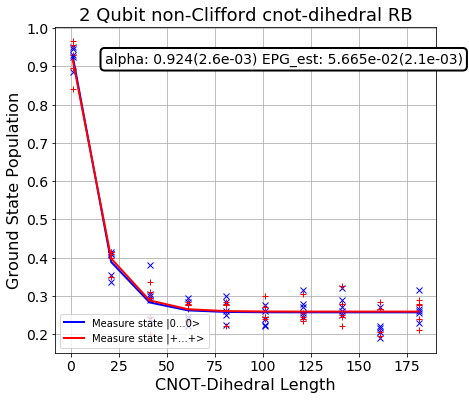

In [54]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

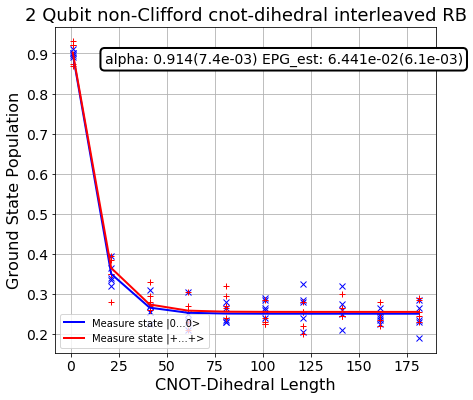

In [55]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()